In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
df = pd.read_csv("water.csv")
df.head(100)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


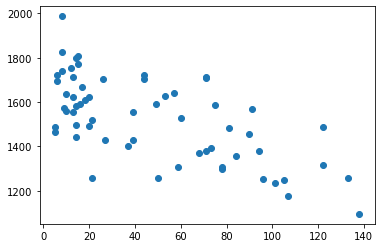

In [32]:
plt.scatter(df.hardness , df.mortality)

In [33]:
### Линейный коэфициент корреляция Пирсона ###
df[['hardness', 'mortality']].corr()


,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [34]:
### Коэфициент корреляция Спирмана ###
df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [35]:
### Коэфициент корреляция Кендалла ###
df[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [36]:

mort1600_1800 = df[ ((df['mortality'] > 1599) & (df['mortality'] < 1800))]
mort1600_1800_mean = (mort1600_1800['hardness'].mean())
print(mort1600_1800_mean)
mort1400_1600 = df[ ((df['mortality'] > 1399) & (df['mortality'] < 1600))]
mort1400_1600_mean = (mort1400_1600['hardness'].mean())
print(mort1400_1600_mean)

28.0
38.68181818181818


Далее для того , чтобы смоделировать функцию хотелось бы попробовать сделать систему уравнений. 
Можно выдвинуть гипотезу условно, что при: 
    y = xa + b
    1700 = 28a + b
    1500 = 38.6819a + b 

In [37]:
M1 = np.array([[28., 1.], [38.6819, 1.]])
v1 = np.array([1700., 1500.])
np.linalg.solve(M1, v1)

array([ -18.72326084, 2224.25130361])

Значит можем попробовать построить примерно такую модель:
y = -18.72326084x +  2224.25130361
Попробуем проверить на примере 

In [38]:
(-18.72326084 * 60) +  2224.25130361

1100.8556532100001

Ну , получилось не точно ( самая тупая модель) , так как модель была весьма примитивная , я предполагаю , что здесь играют роль выбросы,  неточости сбора данных и малое количество данных , чтобы построить эффективную модель,но я пытался. Динамику вроде отражает 

In [ ]:
plt.scatter

In [57]:
X0 = df[['hardness']].values
Y0 = df[['mortality']].values

In [58]:
model_0 =  LinearRegression()
model_0.fit(X0, Y0)
model_0.score(X0 , Y0)

0.4288267193124974

In [60]:
model_0.coef_

array([[-3.22609161]])

In [62]:
model_0.intercept_

array([1676.3556007])

Т.е x = -3.2261, y = 1676.3556
Решил также попробовать и другим методом 


In [64]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [69]:
X1 = sm.add_constant(X0)

In [70]:
model_1 = sm.OLS(Y0 , X1)

In [73]:
results_ = model_1.fit()

In [74]:
print(results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.03e-08
Time:                        13:26:11   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

R-squared: 0.429

In [8]:
plt.scatter(X1[:, 1], results_.resid)

NameError: name 'X1' is not defined

In [9]:
plt.scatter(X0_1[:, 1], results_.resid)

NameError: name 'X0_1' is not defined

In [16]:
columns = ['location' == 'South', 'mortality', 'hardness' ]
df.loc['location' == 'South', 'mortality', 'hardness' ]

IndexingError: Too many indexers